# Wearables iPython Notebook

Required:
Python 3.4 - Using VirtualEnv
mpld3 installed

The purpose of this document is to develop a workflow for the wearables scripts and programs.  




## Get Data from BigQuery

Plotting...


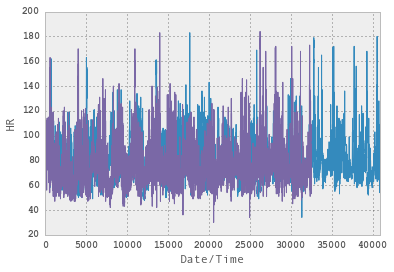

In [4]:
import csv
import numpy
import pandas as pd
import pdb
import pylab
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

basis_b1_hr = []
basis_peak_hr = []
time = []

with open('/Users/dsalins/Documents/SVNRepositories/wearables/data/mps_basis_b1_peak_combined.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',') 
    for i, row in enumerate(spamreader):
        if i > 0:
            #time.append(dt.datetime.strptime(row[0],'%m/%d/%Y').date())
            time.append(row[0])
            try:
                basis_b1_hr.append(float(row[3]))
                basis_peak_hr.append(float(row[8]))
            except:
                pass

# temperature vs ice_cream, fill the series
basis_b1 = pd.Series(basis_b1_hr)
basis_peak = pd.Series(basis_peak_hr)

pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)
pd.set_option('display.mpl_style', 'default')

font = {'size'   : 10}

matplotlib.rc('font', **font)

print("Plotting...")
basis_b1.plot()
basis_peak.plot()

#plt.plot(basis_peak_hr)
#plt.plot(time, basis_b1_hr, 'r--', time, basis_peak_hr, 'bs')
plt.xlabel('Date/Time')
plt.ylabel('HR')
#plt.show()


